# Name: Abhishek Jadhav
# Project: Credit card fraud detection (capstone)    

## First Import libraries which are initially required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('creditcards.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.Time.tail(15)

284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    172782.0
284799    172783.0
284800    172784.0
284801    172785.0
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,0.000017,0.000008,0.014970,0.000023,0.000022,-0.000016,0.000029,0.000003,0.004311,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958679,1.651295,8.073856,1.415859,1.380234,1.332244,1.237076,1.194354,2.538010,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-0.920327,-0.598532,-0.890365,-0.848611,-0.691568,-0.768290,-0.554011,-0.208630,-0.643068,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,0.018027,0.065467,0.179832,-0.019816,-0.054314,-0.274159,0.040104,0.022358,-0.051331,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315632,0.803724,1.027212,0.743355,0.611926,0.398487,0.570450,0.327349,0.597139,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930,22.057729,4232.000000,16.875344,34.801666,73.301626,120.589494,20.007208,1221.000000,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Checking Frequency of Frauds.

In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

492 off 284315 are fraud.

<Axes: xlabel='Class', ylabel='count'>

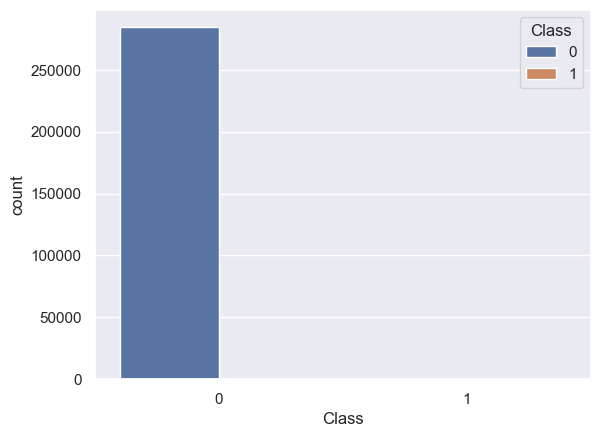

In [9]:
sns.countplot(x=df.Class, hue=df.Class)

                  Above stats shows that data is highly imbalanced.

## Checking distribution of amount

<Axes: xlabel='Amount', ylabel='Density'>

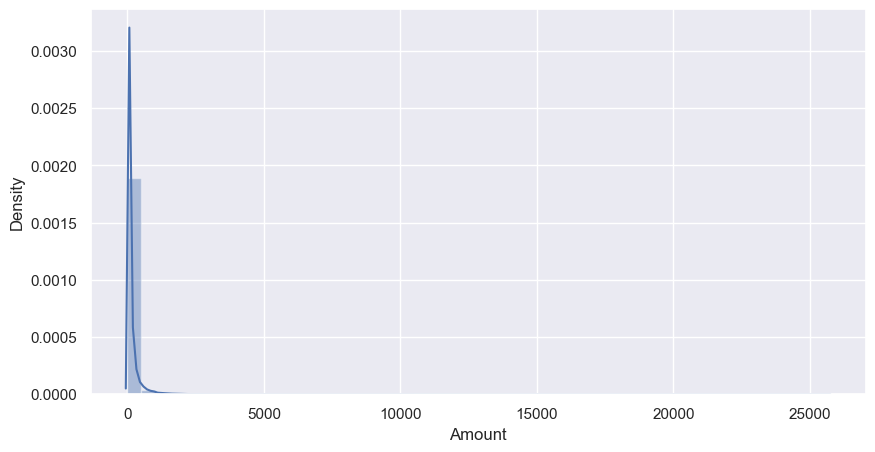

In [10]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

## To group data into range of values lets use amount-bins. 

In [11]:
df['Amount-Bins'] = ''

In [12]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [13]:
bins, bin_labels = make_bins(df.Amount, size=10)

In [14]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


## Lets also plot the bins.

In [15]:
df['Amount-Bins'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
14272 to 17127         0
19982 to 22836         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

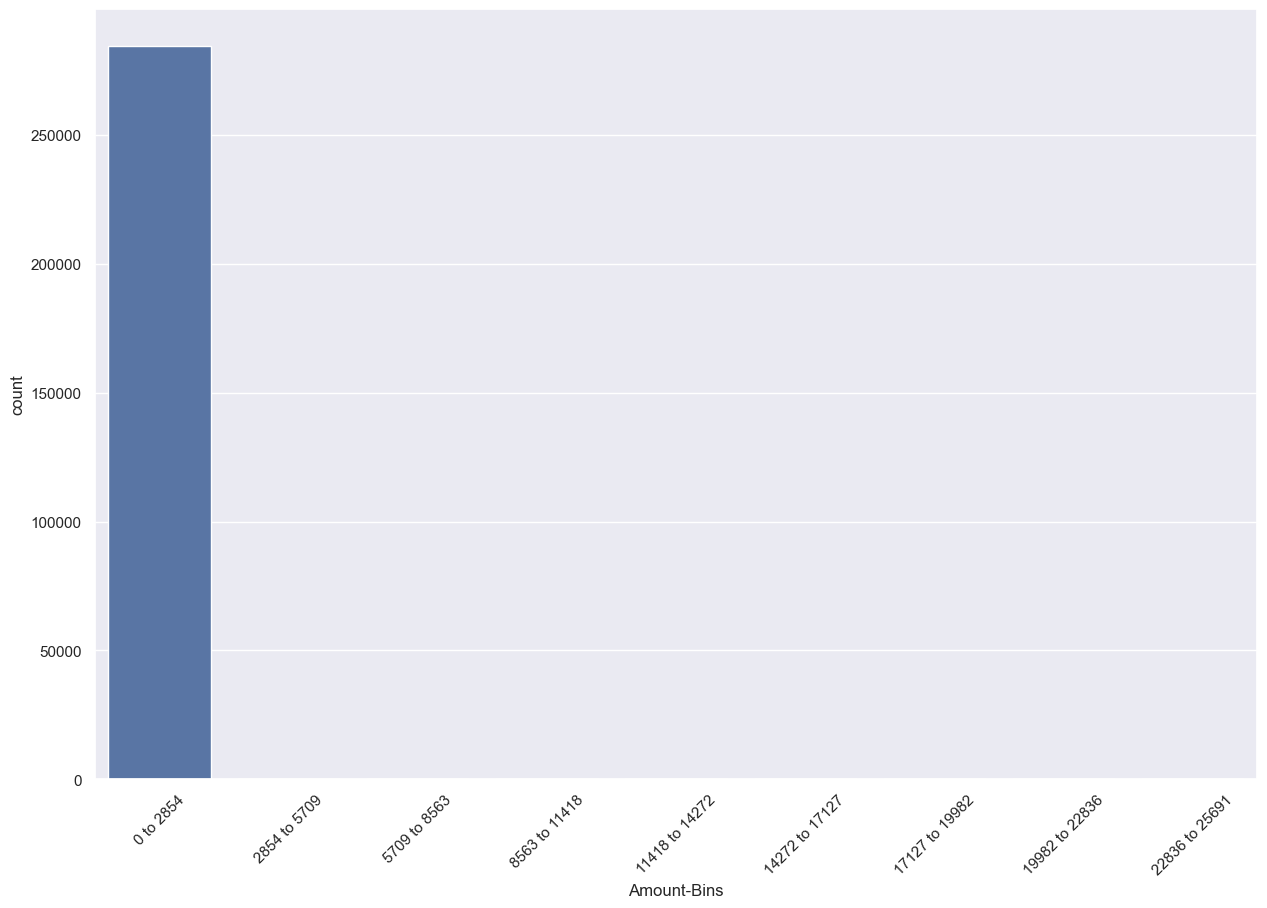

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

This shows value of bins other than 0-2854 are barely visible so not to insert first one.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

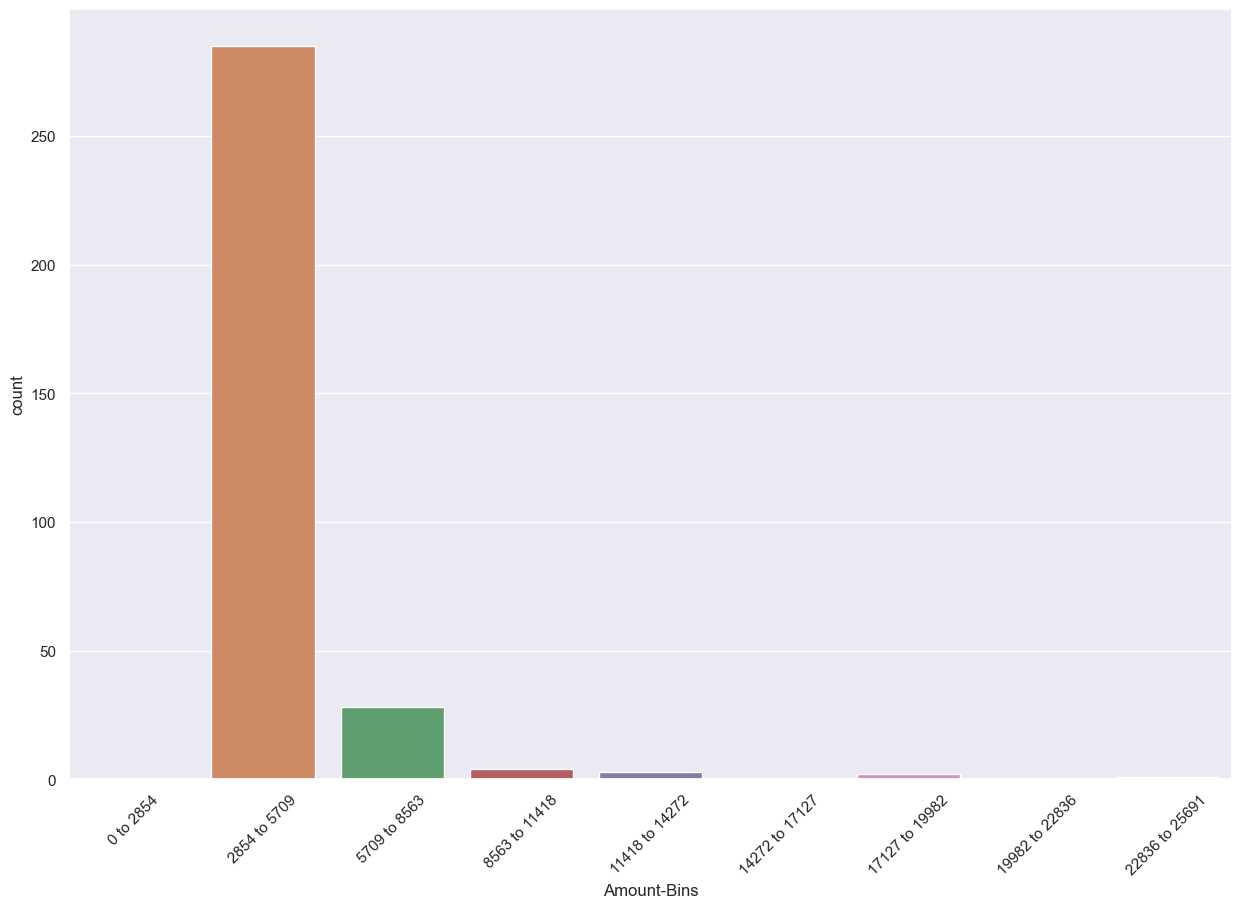

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

Majority Amount ranges between 0 and 2854$

## Predictive modelling

Starting with one-hot encoding the amount-bins

In [18]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,1,0,0,0,0,0,0,0,0


## Breaking data to training and testing.

Seprating response variable from exploratory variables.

In [20]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((284807, 39), (284807,))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


## Starting with application of machine learning algorithms.

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [24]:
lr_model.fit(xtrain, ytrain)    # Training the algorithm.

LogisticRegression()

In [25]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

Before proceeding lets decide type1 or type2 error is more important to consider.

### Type1- false positives are ones which are actually not fraud but predicted as fraud.

### Type2- false negatives are ones which are actually fraud but system considered they are not.

#### Here we should go for type2 errors as it seems more relevant.

In [26]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

### Confusion matrix

In [27]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,95,41
Not Fraud,23,85284


<Axes: >

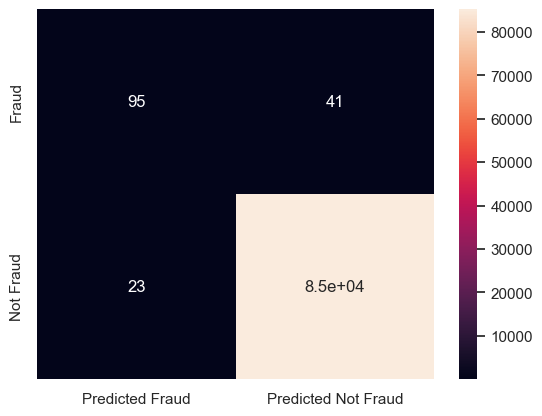

In [28]:
sns.heatmap(conf_matrix, annot=True)

Heatmap shows that data is imbalanced.

In [29]:
lr_accuracy = accuracy_score(ytest, lr_pred_test)
lr_accuracy

0.9992509626300574

This accuracy score is great but it takes the imbalanced data and confusion matrix into account.

### Lets also check precison and recall score.

In [30]:
lr_precision = precision_score(ytest, lr_pred_test)
lr_precision

0.8050847457627118

In [31]:
lr_recall = recall_score(ytest, lr_pred_test)
lr_recall

0.6985294117647058

In [32]:
lr_recall_train = recall_score(ytrain, lr_pred_train)
lr_recall_train

0.7415730337078652

In [33]:
from sklearn.metrics import f1_score

In [34]:
lr_f1 = f1_score(ytest, lr_pred_test)
lr_f1

0.7480314960629922

### Classification report.

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(ytest, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.70      0.75       136

    accuracy                           1.00     85443
   macro avg       0.90      0.85      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [37]:
lr_pred_test_prob = lr_model.predict_proba(xtest)[:, 1]

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

In [39]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)

In [40]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.9143531942416974

In [41]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

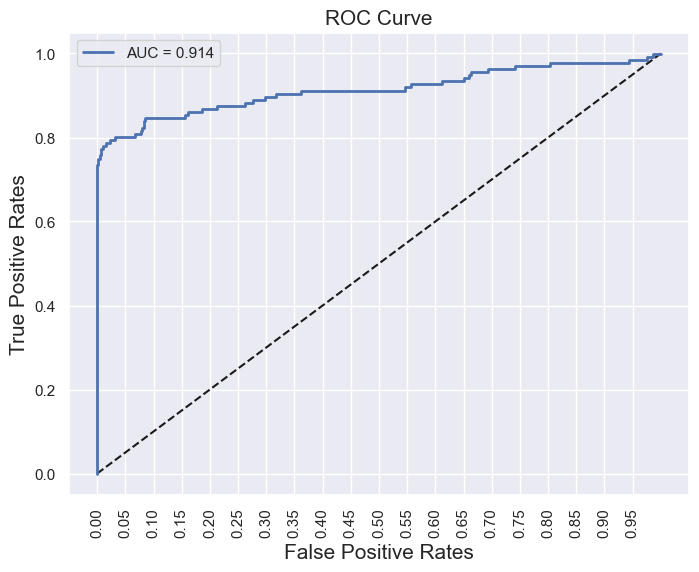

In [42]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

  AUC score of 0.914 is quite good but this is comprising the imbalanced data.

### Model complexity.

Considering above results lets also train the models on 2nd degree of poloynomials.
But going further of second degree can result in memoryerror.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

# Training the model
model = LogisticRegression()
model.fit(xtrain_poly, ytrain)

# Getting the probabilities
train_prob = model.predict_proba(xtrain_poly)[:, 1]
test_prob = model.predict_proba(xtest_poly)[:, 1]

# Computing the ROC Score
roc_auc_score(ytrain, train_prob), roc_auc_score(ytest, test_prob)

(0.9121775043541811, 0.9232433601407788)

#### Plotting ROC curve for testing data.

In [45]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(ytest, test_prob)

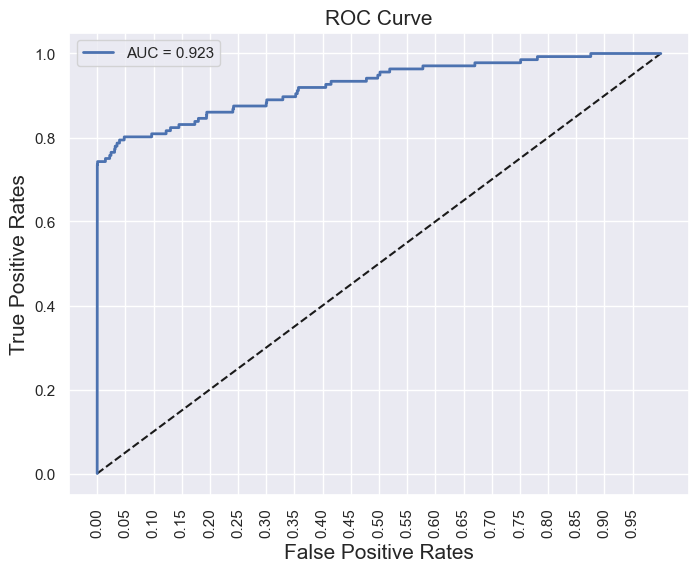

In [46]:
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(ytest, test_prob))

#### Second degree is better in logistic Regression. Gives 0.923 AUC score. 

### Recall

In [47]:
recall_score(ytest, model.predict(xtest_poly))

0.7426470588235294

### Support vector machine algorithm

for support vector machines we need to train model after scaling its features.

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
mms = MinMaxScaler()

In [50]:
# Let's first check the head of the explanatory variables which are to be scaled.
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,1,0,0,0,0,0,0,0,0


In [51]:
X_scaled = mms.fit_transform(X)

In [52]:
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.000000,0.935192,0.766490,0.011883,0.313023,0.763439,0.267669,0.266815,0.786444,0.011177,...,0.005824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.978542,0.770067,0.011329,0.271796,0.766120,0.262192,0.264875,0.786298,0.010676,...,0.000105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000006,0.935217,0.753118,0.011704,0.268766,0.762329,0.281122,0.270177,0.788042,0.009656,...,0.014739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000006,0.941878,0.765304,0.011709,0.213661,0.765647,0.275559,0.266803,0.789434,0.009759,...,0.004807,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000012,0.938617,0.776520,0.011652,0.269796,0.762975,0.263984,0.268968,0.782484,0.011545,...,0.002724,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Lets also train test split on scaled data.

In [53]:
xtrainS, xtestS, ytrainS, ytestS = train_test_split(
    X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)

In [54]:
print(xtrainS.shape, ytrainS.shape)
print(xtestS.shape, ytestS.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


In [55]:
from sklearn.svm import SVC

In [56]:
svc_model = SVC(kernel='linear', probability=True)

In [57]:
svc_model.fit(xtrainS, ytrainS)

SVC(kernel='linear', probability=True)

In [58]:
svc_pred = svc_model.predict(xtestS)

In [59]:
svc_recall = recall_score(ytestS, svc_pred)

In [60]:
svc_recall

0.8014705882352942

In [61]:
svc_pred_prob = svc_model.predict_proba(xtestS)[:, 1]

### ROC curve

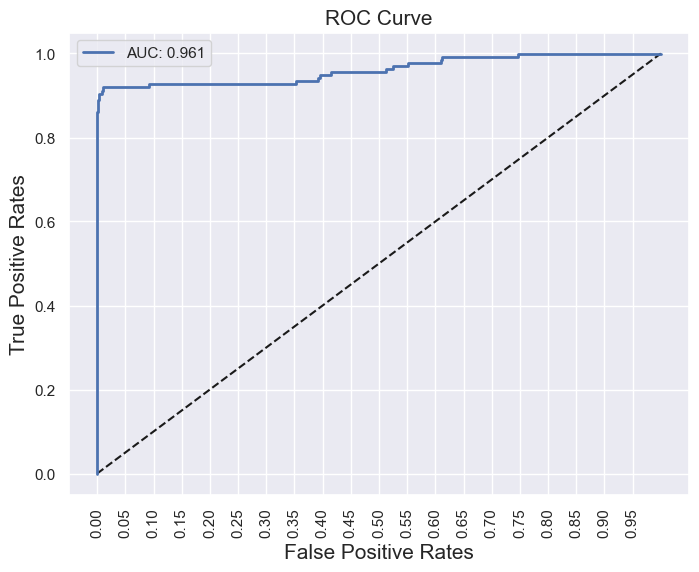

In [62]:
# First, getting the auc score
svc_auc = roc_auc_score(ytestS, svc_pred_prob)

# Now, let's get the fpr and tpr
fpr, tpr, threshold = roc_curve(ytestS, svc_pred_prob)

# Now, let's draw the curve
plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)

### Tuning Hyper-parameters

Lets tune some of the hyper-parameters of SVM and compare the scores.

In [63]:
# For Kernel = rbf
tuned_rbf = {'kernel': ['rbf'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = sigmoid
tuned_sigmoid = {'kernel': ['sigmoid'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = linear
tuned_linear = {'kernel': ['linear'], 'C': [
    0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
rs_rbf = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_rbf, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_sigmoid = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_sigmoid, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_linear = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_linear, n_iter=500, n_jobs=4, scoring='roc_auc')

### Kernel rbf

In [66]:
rs_rbf.fit(xtrainS, ytrainS)

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'gamma': [0.01, 0.001, 0.0001, 1e-05],
                                        'kernel': ['rbf']},
                   scoring='roc_auc')

In [67]:
rs_rbf.best_estimator_

SVC(C=1000, gamma=0.01, probability=True)

In [68]:
svc_rbf_best_est = rs_rbf.best_estimator_

Lets also fit model on best rbf estimator.

In [69]:
svc_rbf_best_est.fit(xtrainS, ytrainS)

SVC(C=1000, gamma=0.01, probability=True)

In [70]:
svc_rbf_best_est_pred = svc_rbf_best_est.predict(xtestS)

In [71]:
svc_rbf_best_est_pred_proba = svc_rbf_best_est.predict_proba(xtestS)[:, 1]

Getting Auc score

In [72]:
svc_rbf_auc = roc_auc_score(ytestS, svc_rbf_best_est_pred_proba)

Recall score

In [73]:
svc_rbf_recall = recall_score(ytestS, svc_rbf_best_est_pred)
svc_rbf_recall

0.8308823529411765

Got Recall & Roc score so lets get Roc curve to. 

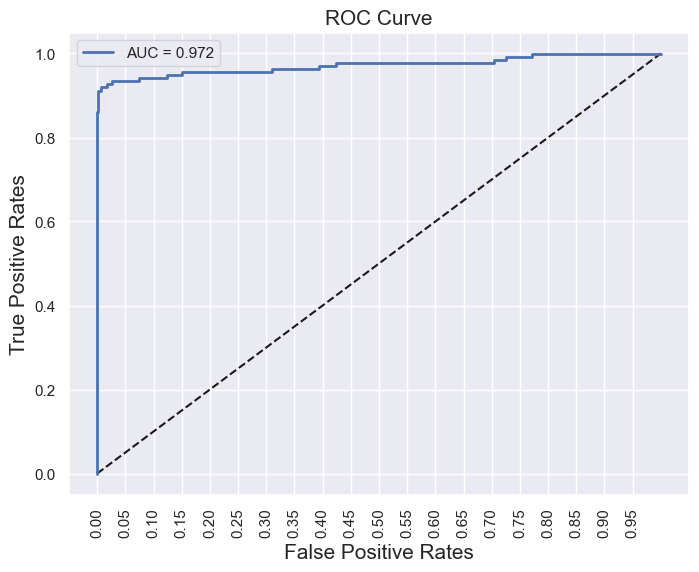

In [74]:
fpr, tpr, threshold = roc_curve(ytestS, svc_rbf_best_est_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_rbf_auc)

### Kernel sigmoid

In [75]:
rs_sigmoid.fit(xtrainS, ytrainS)

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'gamma': [0.01, 0.001, 0.0001, 1e-05],
                                        'kernel': ['sigmoid']},
                   scoring='roc_auc')

In [76]:
svc_sigmoid = rs_sigmoid.best_estimator_

In [77]:
svc_sigmoid.fit(xtrainS, ytrainS)

SVC(C=1000, gamma=0.01, kernel='sigmoid', probability=True)

In [78]:
svc_sigmoid_pred = svc_sigmoid.predict(xtestS)
svc_sigmoid_pred_proba = svc_sigmoid.predict_proba(xtestS)[:, 1]

### For Auc

In [79]:
svc_sigmoid_auc = roc_auc_score(ytestS, svc_sigmoid_pred_proba)
svc_sigmoid_auc

0.9648393621928826

### For Recall

In [80]:
svc_sigmoid_recall = recall_score(ytestS, svc_sigmoid_pred)
svc_sigmoid_recall

0.8161764705882353

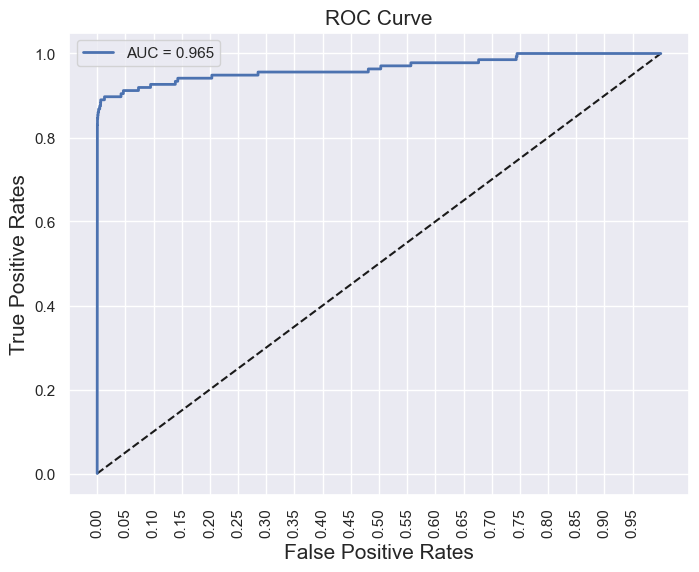

In [81]:
fpr, tpr, threshold = roc_curve(ytestS, svc_sigmoid_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_sigmoid_auc)

### Checking linear kernel

In [82]:
rs_linear.fit(xtrainS, ytrainS)

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'kernel': ['linear']},
                   scoring='roc_auc')

In [83]:
svc_linear = rs_linear.best_estimator_

In [84]:
svc_linear.fit(xtrainS, ytrainS)

SVC(C=25, kernel='linear', probability=True)

### Get predictions and probabilities

In [85]:
svc_linear_pred = svc_linear.predict(xtestS)
svc_linear_pred_proba = svc_linear.predict_proba(xtestS)[:, 1]

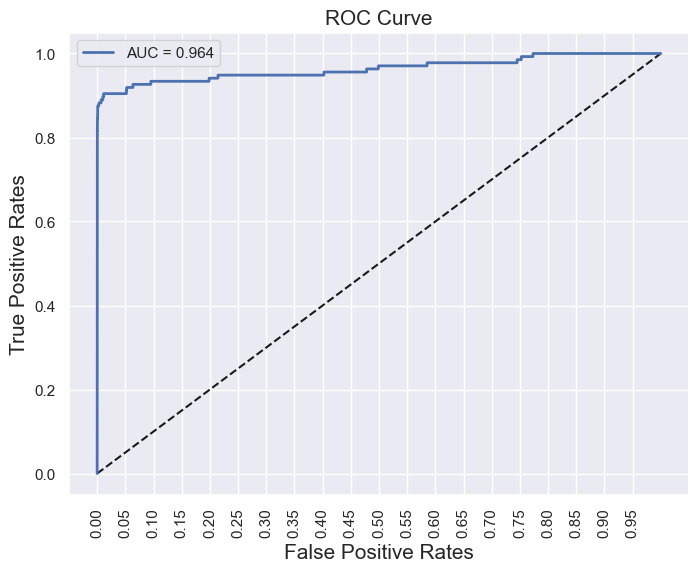

In [86]:
svc_linear_auc = roc_auc_score(ytestS, svc_linear_pred_proba)

fpr, tpr, threshold = roc_curve(ytestS, svc_linear_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_linear_auc)

In [87]:
svc_linear_recall = recall_score(ytestS, svc_linear_pred)
svc_linear_recall

0.8235294117647058

AUC is great in case of linear kernel.

## Naive bayes machine learning algorithm

Naive choice is good choice as the dataset is small and is relatively fast.

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
nb = GaussianNB()

### First will train algorithm on default settings.

In [90]:
nb.fit(xtrain, ytrain)

GaussianNB()

In [91]:
nb_pred = nb.predict(xtest)
nb_pred_proba = nb.predict_proba(xtest)[:, 1]

In [92]:
nb_auc = roc_auc_score(ytest, nb_pred)

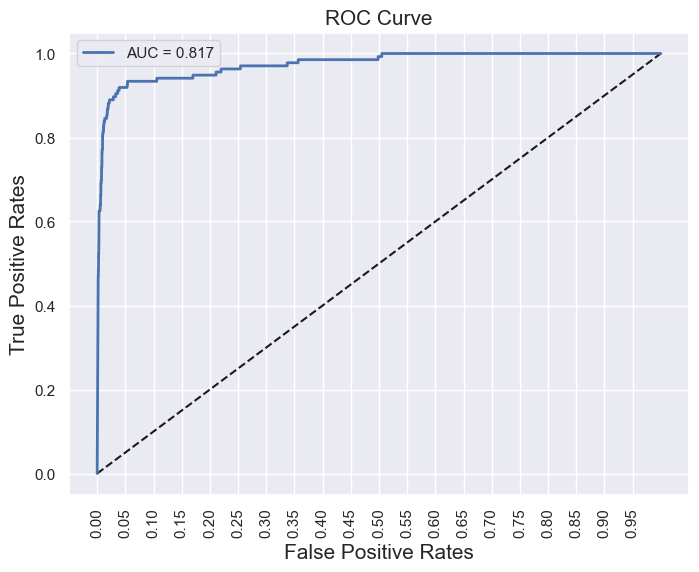

In [93]:
fpr, tpr, threshold = roc_curve(ytestS, nb_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % nb_auc)

In [94]:
nb_recall = recall_score(ytest, nb_pred)
nb_recall

0.6397058823529411

#### Result: Scores were better in other as compared to Naive bayes.